# Equalização Local De Histogramas

**Curso**: Processamento Digital de Imagens - UFScar 2020/2

**Alunos**:
- Leonardo Donderi Rodrigues (754756)
- Luís Felipe Corrêa Ortolan (759375)
- Marco Antonio Bernardi Grivol (758619)
- Reynold Navarro Mazo (756188)

O Objetivo desse trabalho é implementar a equalização local de histogramas de uma imagem, ou seja, realizar a equalização de histogramas de partes menores da imagem separadamente e depois juntá-las.

A técnica do histograma é usada para balancear o número de píxels de cada intensidade, gerando uma imagem com mais contraste e, em alguns casos, melhora a aparência da imagem. Veremos que tipo de resultado, comparado ao da equalização do histograma completo, gera a equalização de partes individuais da imagem.

In [ ]:
# Import de bibliotecas.

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def histogram_equalization(img):
    """Equalização de Histograma
    
    Função que implementa a equalização de uma imagem completa.
    
    Parâmetros
    ----------
    img : numpy array
        Imagem a ser realizada a equalização de histograma.
    
    Return
    -------
    img_eq : numpy array, mesmo tamanho que img 
        Uma imagem com histograma equalizado, ou seja, com maior contraste.
    """
    bins = range(0, 257)
    hist, _ = np.histogram(img, bins)
    
    mn = sum(hist)
    c = 255.0 / mn
    out_intensity = np.zeros(256)
    for k in range(256):
        soma = 0
        for j in range(0, k + 1):
            soma += hist[j]
        out_intensity[k] = c * soma

    img_eq = np.zeros(img.shape)
    num_rows, num_cols = img.shape
    for row in range(num_rows):
        for col in range(num_cols):
            img_eq[row, col] = out_intensity[int(img[row, col])]
    
    return img_eq

Tamanho da imagem:  (540, 960)
Valores máximos e mínimo:  0 255


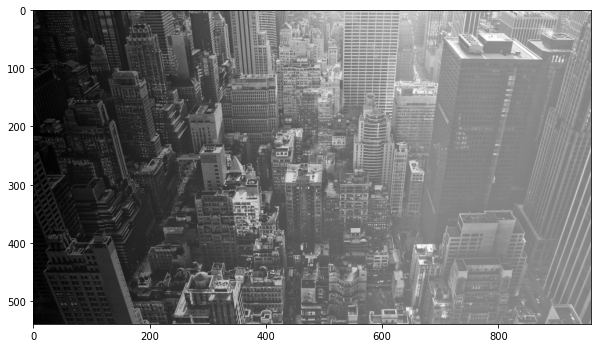

In [ ]:
# Leitura da imagem original.
img = plt.imread("city_gradient.tiff")
img = (img[:,:,0])
# Informações sobre a imagem original
print("Tamanho da imagem: ", img.shape)
print("Valores máximos e mínimo: ", np.min(img), np.max(img))
plt.figure(figsize=[10, 10])
_ = plt.imshow(img, 'gray')

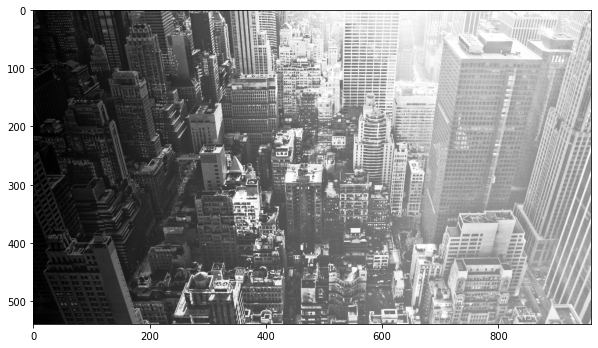

In [ ]:
# Equalização da Imagem como um todo.
img_normal_eq = histogram_equalization(img)
plt.figure(figsize=[10, 10])
_ = plt.imshow(img_normal_eq, 'gray')

In [ ]:
def local_equalization(imagem, n):
    """Equalização Local de Histograma
    
    Função que divide a imagem em um número de blocos n^2 e chama a função para equalizar cada bloco separadamente.
    
    Parâmetros
    ----------
    imagem : numpy array
        Imagem a ser realizada a equalização local de histograma.
        
    n : int
        O número de divisões que se dejesa.
    
    Return
    -------
    img_eq : numpy array, mesmo tamanho que img 
        Uma imagem com histogramas locais equalizados.
    """
    
    divisoes = n # Número de divisões por linha e por coluna.
  
    # Tamanho da imagem.
    num_linhas = imagem.shape[0] 
    num_cols = imagem.shape[1]

    img_local_eq = np.empty((num_linhas, num_cols), dtype=int)

    row_sub = num_linhas // divisoes # Número de linhas em cada divisão.
    col_sub = num_cols // divisoes # Número de colunas em cada divisão.
    for i in range(divisoes):
        # Linhas iniciais e finais em um determinado bloco.
        row_start = i * row_sub
        row_end = (i + 1) * row_sub
        for j in range(divisoes):
            # Colunas iniciais e finais em um determinado bloco.
            col_start = j * col_sub
            col_end = (j + 1) * col_sub
            # A nova imagem recebe a divisão atual já equalizada.
            img_local_eq[row_start : row_end, col_start : col_end] = histogram_equalization(img[row_start : row_end, col_start : col_end])
          
    return img_local_eq

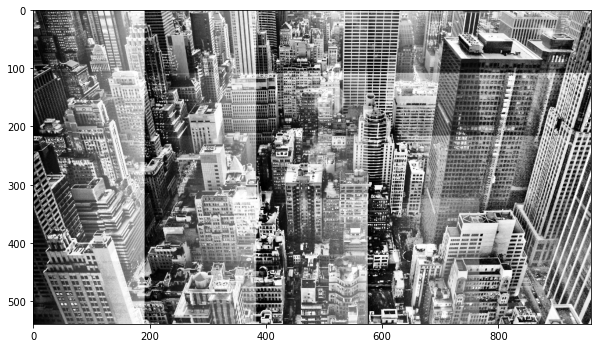

In [ ]:
# Equalização da imagem localmente, em 5 blocos
img_local_eq = local_equalization(img,5)
plt.figure(figsize=[10, 10])
_ = plt.imshow(img_local_eq, 'gray')

Text(0.5, 1.0, 'Local Equalization')

<Figure size 432x288 with 0 Axes>

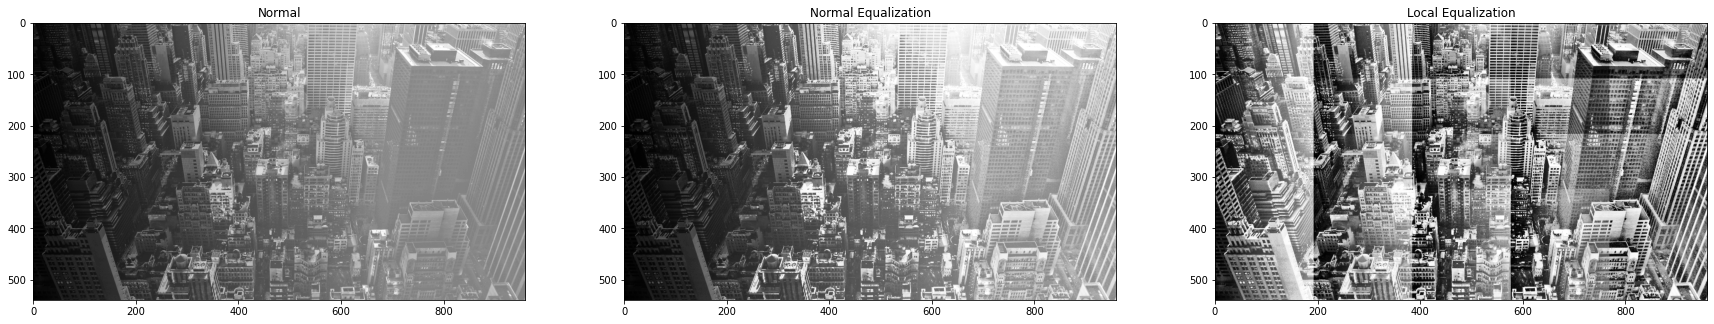

In [ ]:
# Comparação da figura original, com a normalizada e a normalizada localmente.
plt.figure()
f, ax = plt.subplots(1, 3, figsize=[30, 30])
ax[0].imshow(img, 'gray')
ax[0].set_title('Normal')
ax[1].imshow(img_normal_eq, 'gray')
ax[1].set_title('Normal Equalization')
ax[2].imshow(img_local_eq, 'gray')
ax[2].set_title('Local Equalization')

<Figure size 432x288 with 0 Axes>

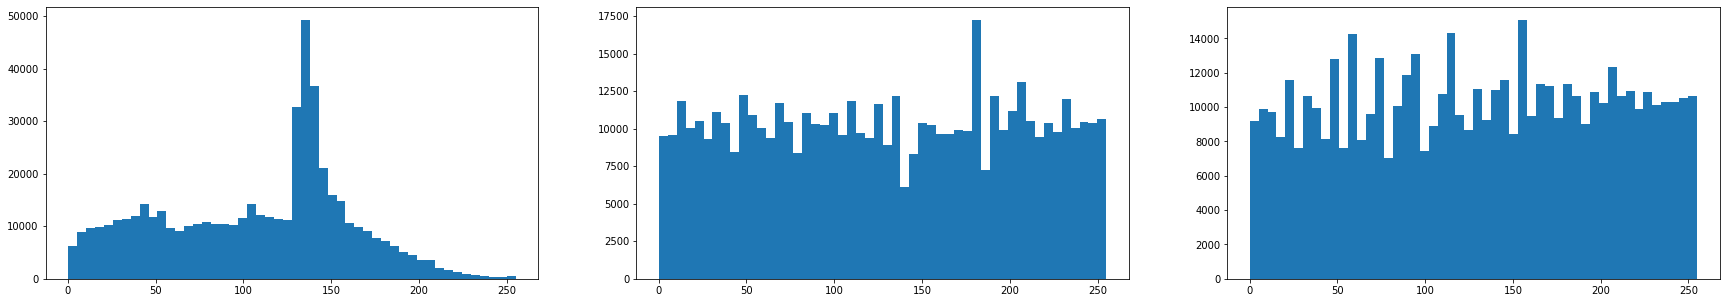

In [ ]:
# Comparação entre os três histogramas.

plt.figure()
f, ax = plt.subplots(1, 3, figsize=[30, 5]) 
ax[0].hist(img.flatten(), 50)
ax[1].hist(img_normal_eq.flatten(), 50)
_ = ax[2].hist(img_local_eq.flatten(), 50)

In [ ]:
# Equaliza o histograma em difrentes partições.

img_local_eq10 = local_equalization(img,10)
img_local_eq20 = local_equalization(img,20)
img_local_eq30 = local_equalization(img,30)

Text(0.5, 1.0, 'Histograma Equalizado Com N = 30')

<Figure size 432x288 with 0 Axes>

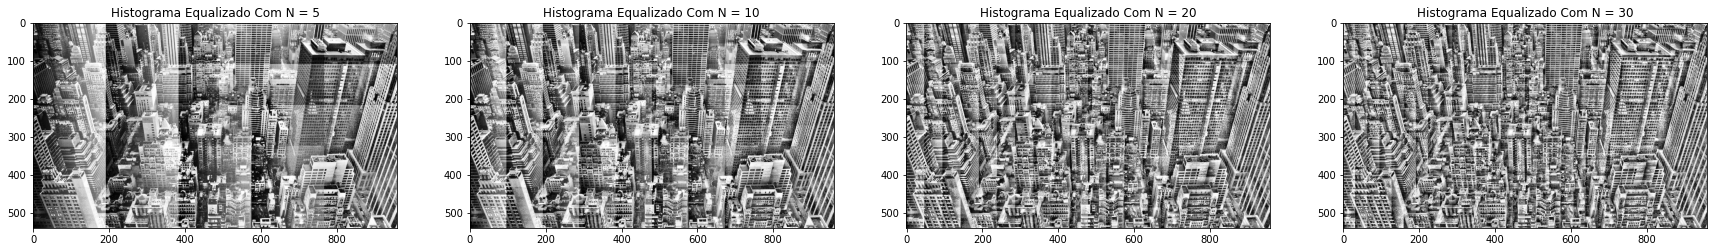

In [ ]:
# Comparação imagens equalizadas com diferentes parâmetros.
plt.figure()
f, ax = plt.subplots(1, 4, figsize=[30, 30])
ax[0].imshow(img_local_eq, 'gray')
ax[0].set_title('Histograma Equalizado Com N = 5')
ax[1].imshow(img_local_eq10, 'gray')
ax[1].set_title('Histograma Equalizado Com N = 10')
ax[2].imshow(img_local_eq20, 'gray')
ax[2].set_title('Histograma Equalizado Com N = 20')
ax[3].imshow(img_local_eq30, 'gray')
ax[3].set_title('Histograma Equalizado Com N = 30')

<Figure size 432x288 with 0 Axes>

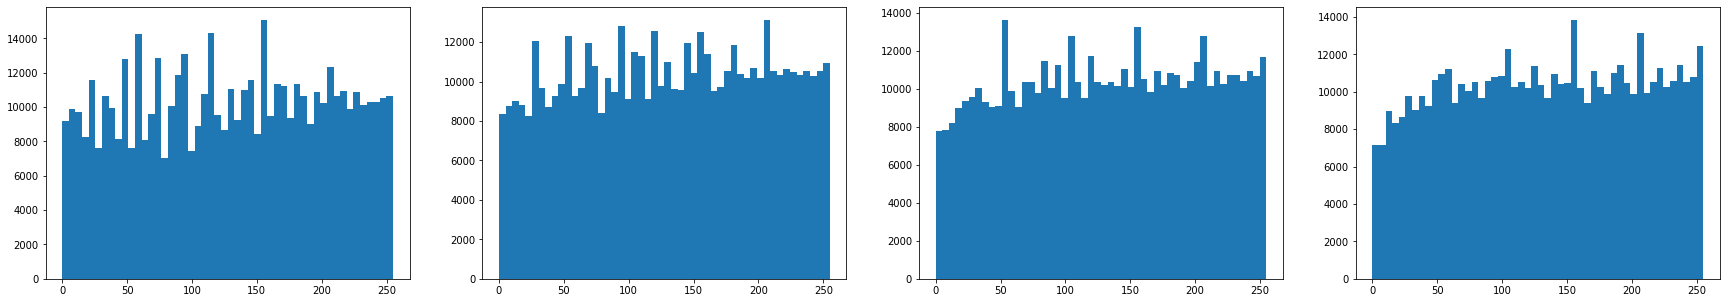

In [ ]:
# Mostra os histogramas das imagens equalizadas

plt.figure()
f, ax = plt.subplots(1, 4, figsize=[30, 5]) 
ax[0].hist(img_local_eq.flatten(), 50)
ax[1].hist(img_local_eq10.flatten(), 50)
ax[2].hist(img_local_eq20.flatten(), 50)
_ = ax[3].hist(img_local_eq30.flatten(), 50)

É possível ver que os histogramas equalizados localmente acabam ficando com um histograma local mais bem equalizado que uma equalização global simples. Além de tudo, quanto maior o número de divisões, melhor fica essa aplicação e o contraste cada vez maior na imagem. Além disso, a equalização local de histograma lida melhor com variações de luminosidade, gerando um histograma com maior realce nesse tipo de imagem.

Uma desvantagem de equalizações locais com número de divisões baixas, é que elas podem acabar gerando linhas na imagem, que indicam exatamente onde a divisão dos blocos foi feita. Como por exemplo na imagem com 25 divisões.

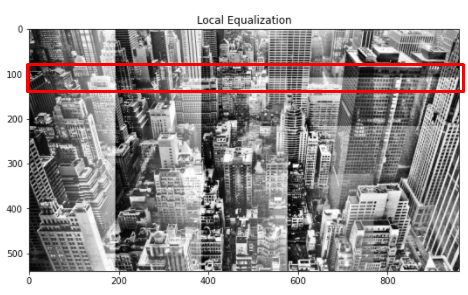

Isso acontece porque como os blocos acabam ficando grandes, podem ser muito diferentes dos seus vizinhos, gerando um valor totalmente diferente mesmo para píxels que podiam ter o mesmo valor anteriormente. Isso pode ser mitigado aumentando o número de divisões, assim cada bloco respeita mais a localidade e propriedades semelhantes entre píxels